[1] 6497   13

[1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
 [4] "residual.sugar"       "chlorides"            "free.sulfur.dioxide" 
 [7] "total.sulfur.dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"             
[13] "Class"

[1] 4332   13

[1] 2165   13

Accuracy 
0.9745958

               
Prediction_tree    0    1
              0 1614   32
              1   23  496

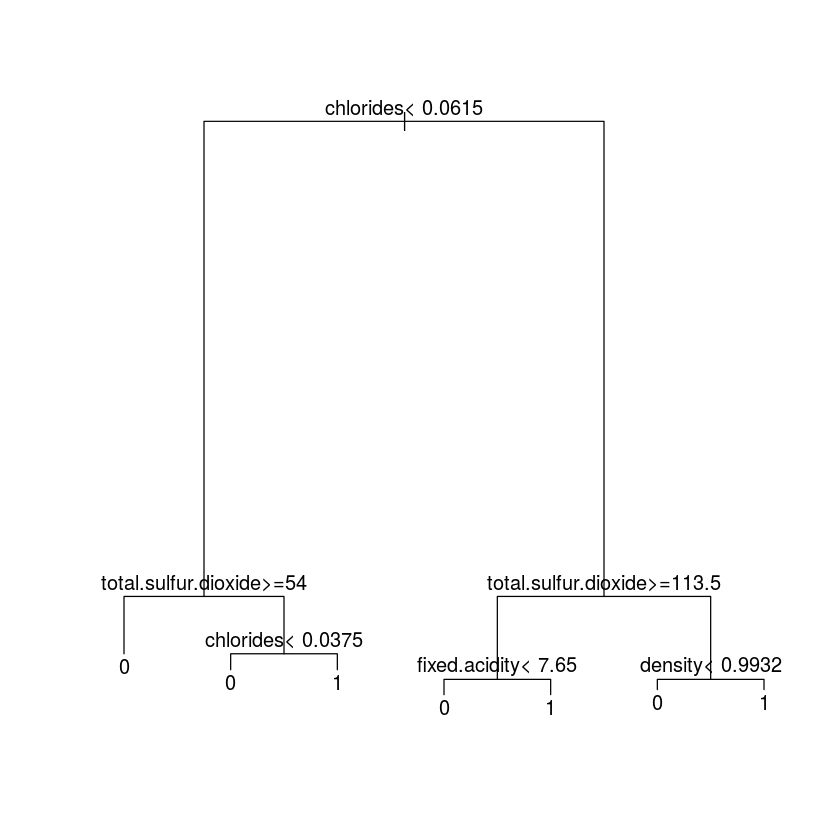


Call:
roc.default(response = Testing$Class, predictor = Prediction_tree[,     2])

Data: Prediction_tree[, 2] in 1637 controls (Testing$Class 0) < 528 cases (Testing$Class 1).
Area under the curve: 0.9727

Accuracy 
0.8979215

               
Prediction_tree    0    1
              0 1567  151
              1   70  377

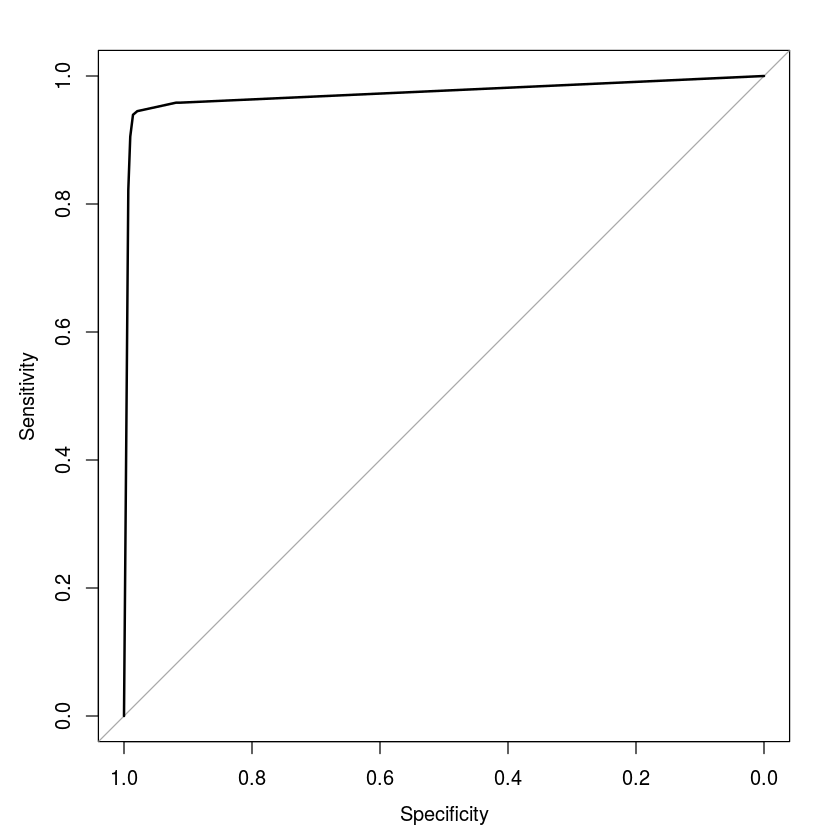


Call:
roc.default(response = Testing$Class, predictor = Prediction_tree[,     2])

Data: Prediction_tree[, 2] in 1637 controls (Testing$Class 0) < 528 cases (Testing$Class 1).
Area under the curve: 0.8606

Accuracy 
0.9570439

               
Prediction_tree    0    1
              0 1593   49
              1   44  479

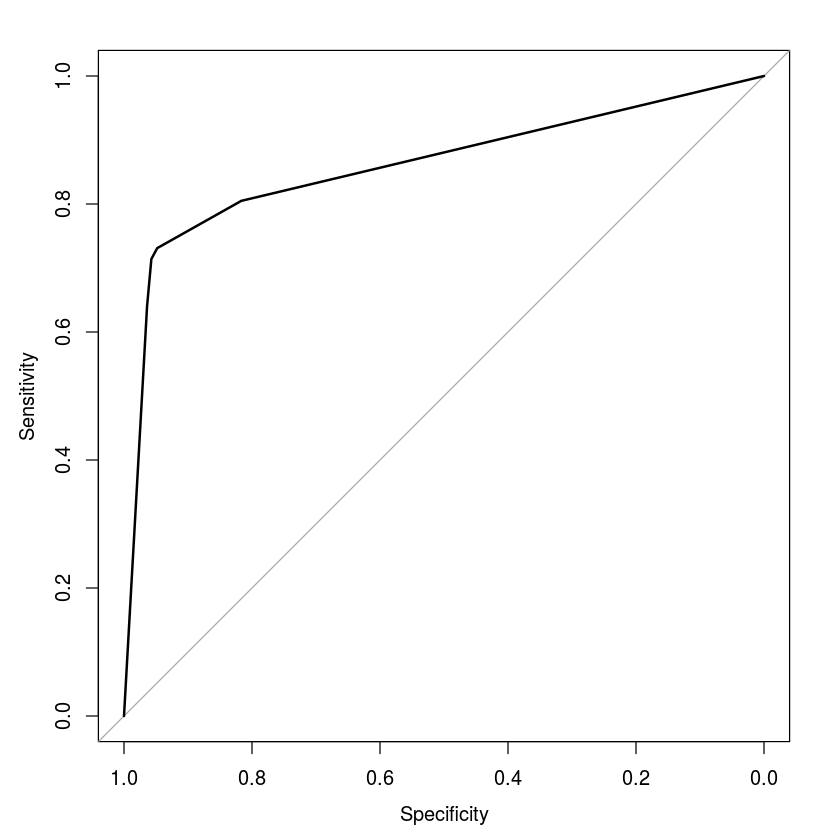


Call:
roc.default(response = Testing$Class, predictor = Prediction_tree[,     2])

Data: Prediction_tree[, 2] in 1637 controls (Testing$Class 0) < 528 cases (Testing$Class 1).
Area under the curve: 0.9471

Accuracy 
0.9745958

               
Prediction_tree    0    1
              0 1614   32
              1   23  496

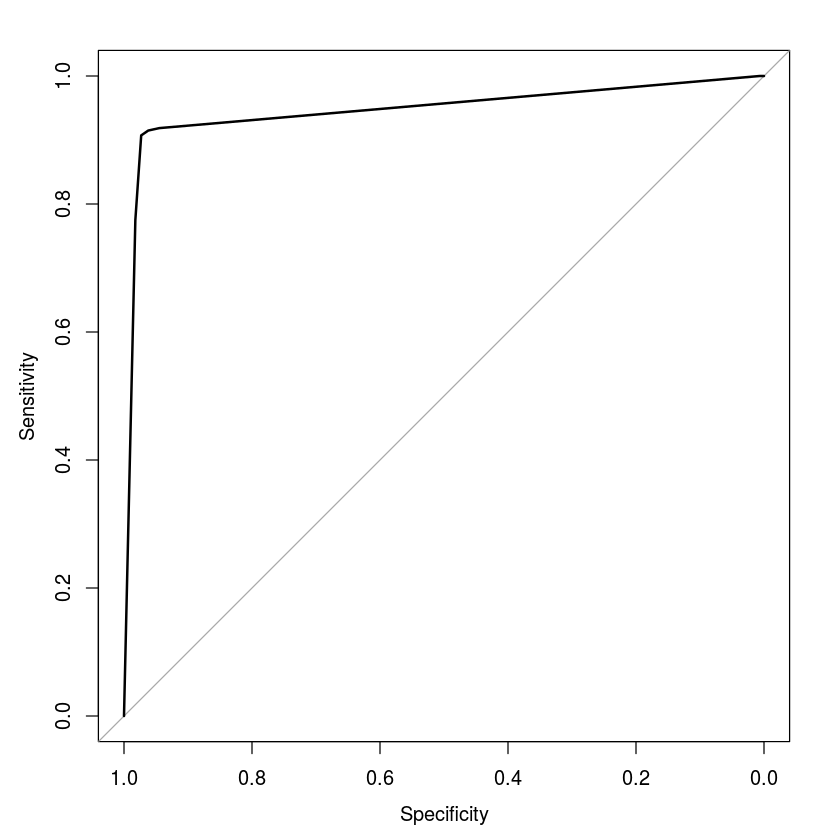


Call:
roc.default(response = Testing$Class, predictor = Prediction_tree[,     2])

Data: Prediction_tree[, 2] in 1637 controls (Testing$Class 0) < 528 cases (Testing$Class 1).
Area under the curve: 0.9727

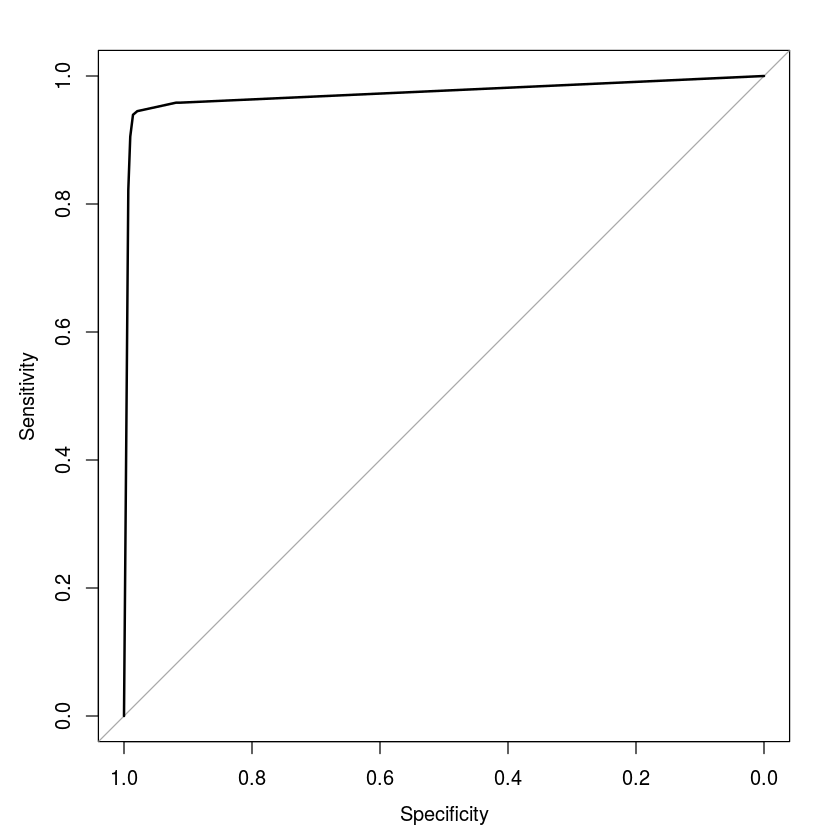

In [2]:
library(data.table)
library(dplyr)
library(rpart)
library(caret)
library(pROC)

#read the data file

RedWhiteWine = read.csv('RedWhiteWine.csv')
RedWhiteWine = data.table(RedWhiteWine)
dim(RedWhiteWine)

colnames(RedWhiteWine)

#Creating test and traing sample data

index = 1:nrow(RedWhiteWine)
traingIndex = sample(index, trunc(length(index)/3))
Testing = RedWhiteWine[traingIndex, ]
Training = RedWhiteWine[-traingIndex, ]


dim(Training)
dim(Testing)


# creating decision tree model using all the attributes

Decision_treeModel = rpart(Class~. , data = Training, method = "class")

# plot the tree

plot(Decision_treeModel)
text(Decision_treeModel)
#print(Decision_treeModel)
#summary(Decision_treeModel)


#Prediction for accuracy

Prediction_tree = predict( Decision_treeModel, Testing, type="class")

#finding accuracy
conf.tree = confusionMatrix(table(Prediction_tree,Testing$Class))
conf.tree$overall[1]
conf.tree$table

#Prediction for AUC 

Prediction_tree = predict(Decision_treeModel, Testing, type = "prob")

# finding AUC and plotting ROC

ROC_curve= roc(Testing$Class, Prediction_tree[,2])
plot(ROC_curve)



# creating decision tree model using only few attributes

Decision_treeModel_1 = rpart(Class ~ fixed.acidity + free.sulfur.dioxide + density, data = Training, method = "class")

# plot the tree

#plot(Decision_treeModel_1)
#text(Decision_treeModel_1)
#print(Decision_treeModel_1)
#summary(Decision_treeModel_1)


#Prediction for accuracy

Prediction_tree = predict( Decision_treeModel_1, Testing, type="class")

#finding accuracy
conf.tree = confusionMatrix(table(Prediction_tree,Testing$Class))
conf.tree$overall[1]
conf.tree$table

#Prediction for AUC 

Prediction_tree = predict(Decision_treeModel_1, Testing, type = "prob")

# finding AUC and plotting ROC

ROC_curve= roc(Testing$Class, Prediction_tree[,2])
plot(ROC_curve)


# creating decision tree model using only few attributes

Decision_treeModel_2 = rpart(Class ~ fixed.acidity + free.sulfur.dioxide + volatile.acidity + citric.acid + total.sulfur.dioxide + sulphates, data = Training, method = "class")

#Prediction for accuracy

Prediction_tree = predict( Decision_treeModel_2, Testing, type="class")

#finding accuracy
conf.tree = confusionMatrix(table(Prediction_tree,Testing$Class))
conf.tree$overall[1]
conf.tree$table

#Prediction for AUC 

Prediction_tree = predict(Decision_treeModel_2, Testing, type = "prob")

# finding AUC and plotting ROC

ROC_curve= roc(Testing$Class, Prediction_tree[,2])
plot(ROC_curve)


# creating decision tree model using only few attributes

Decision_treeModel_3 = rpart(Class ~ fixed.acidity + free.sulfur.dioxide + volatile.acidity + citric.acid + total.sulfur.dioxide + sulphates + residual.sugar + chlorides + density + pH + alcohol, data = Training, method = "class")

#Prediction for accuracy

Prediction_tree = predict( Decision_treeModel_3, Testing, type="class")

#finding accuracy
conf.tree = confusionMatrix(table(Prediction_tree,Testing$Class))
conf.tree$overall[1]
conf.tree$table

#Prediction for AUC 

Prediction_tree = predict(Decision_treeModel_3, Testing, type = "prob")

# finding AUC and plotting ROC

ROC_curve= roc(Testing$Class, Prediction_tree[,2])
plot(ROC_curve)

  
# Build an experiment using Decision Trees. Ans- build decision tree using test and training sample data. 
# What is the percentage of correct classification results (using all attributes)? the accuracy is 97.69% 
# What is the percentage of correct classification results (using a subset of the attributes)? the accuracy is 88.36-97.69%. 
# What is the AUC of your model? Ans - AUC for the model with all the attribut is 97.83%. with subset of attributes accuracy is 83.2-97.83%.
# Visualize your decision tree. Tree and ROC curves plotted below.data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0gAAANICAMAAADKOT/pAAAC7lBMVEUAAAABAQECAgIDAwMEBAQFBQUGBgYHBwcICAgJCQkKCgoLCwsMDAwNDQ0ODg4PDw8QEBARERESEhITExMUFBQVFRUWFhYXFxcYGBgZGRkaGhobGxscHBwdHR0eHh4fHx8gICAhISEiIiIjIyMkJCQlJSUmJiYnJycoKCgpKSkqKiorKyssLCwtLS0uLi4vLy8wMDAxMTEyMjIzMzM0NDQ1NTU2NjY3Nzc4ODg5OTk6Ojo7Ozs8PDw9PT0+Pj4/Pz9AQEBBQUFCQkJDQ0NERERFRUVGRkZHR0dISEhJSUlKSkpLS0tMTExNTU1PT09QUFBRUVFSUlJTU1NUVFRVVVVWVlZXV1dYWFhZWVlaWlpbW1tcXFxdXV1eXl5fX19gYGBhYWFiYmJjY2NkZGRlZWVmZmZnZ2doaGhpaWlqampra2tsbGxtbW1ubm5vb29wcHBxcXFycnJ0dHR1dXV2dnZ3d3d4eHh5eXl6enp7e3t8fHx9fX1/f3+AgICBgYGCgoKDg4OEhISFhYWGhoaHh4eIiIiJiYmKioqLi4uMjIyNjY2Ojo6Pj4+QkJCRkZGSkpKTk5OUlJSVlZWWlpaXl5eZmZmampqbm5ucnJydnZ2enp6fn5+goKChoaGjo6OkpKSlpaWmpqanp6eoqKipqamqqqqrq6usrKytra2urq6vr6+wsLCxsbGysrKzs7O0tLS1tbW2tra3t7e4uLi5ubm6urq7u7u8vLy9vb2+vr6/v7/AwMDBwcHCwsLDw8PExMTGxsbHx8fIyMjJycnKysrLy8vMzMzNzc3Ozs7Pz8/Q0NDR0dHS0tLT09PU1NTV1dXW1tbX19fY2NjZ2dna2trb29vc3Nzd3d3e3t7f39/g4ODh4eHi4uLj4+Pk5OTl5eXm5ubn5+fo6Ojp6enq6urr6+vs7Ozt7e3u7u7v7+/w8PDx8fHy8vLz8/P09PT19fX29vb39/f4+Pj5+fn6+vr7+/v8/Pz9/f3+/v7///++tc46AAAACXBIWXMAABJ0AAASdAHeZh94AAAgAElEQVR4nO3de2BU9Znw8SehAknQIFSJBBFoRRSQe6jS1nrFu3hBKFBAUWqxXupSrau2+tpdW1bd2q2Frlvfdu1bW7qKtVYtpbZV10txAWut0rUCKoIgyCUkc/57z2UmcyaZ4TL5PWdm8nw/f5iTMyeZM3n4Zi5JfooHoNOk1CcAdAWEBDhASIADhAQ4QEiAA4QEOEBIgAOEBDhASIADhAQ4QEiAA4QEOEBIgAOEBDhASIADhAQ4QEiAA4QEOEBIgAOEBDhASIADhAQ4QEiAA4QEOEBIgAOEBDhASIADhAQ4QEiAA4QEOEBIgAOEBDhASIADhAQ4QEiAA4QEOEBIgAOEBDhASIADhAQ4QEiAA4QEOEBIgAOEBDhASIADhAQ4QEiAA4QEOEBIgAOEBDhASIADhAQ4QEiAA4QEOEBIgAOEBDhASIADhAQ4QEiAA4QEOEBIgAOEBDhASIADhAQ4QEiAA4QEOEBIgAOEBDhASIADhAQ4QEiAA4QEOEBIgAOEBDhASIADhAQ4QEiAA4QEOEBIgAOEBDhASIADhAQ4QEiAA4QEOEBIgAOEBDhASIADhAQ4QEiAA4QEOEBIgAOEBDhASIADhAQ4QEiAA4QEOEBIgAOEBDhASIADhOTYfPkgszlD9uQ5YJw8ntmc1G//P2/z7UO6D/lGc/4dT3y2V8Olb6YvWFwfvZ02KXT//l8HikdIjimFlJouAy5ulGmpfDv+Q+rPP1UOfye8YM+EKKTWHhK6+UBvAYpBSI7tM6R1a3dkNg8gpBdl4k5vZ5O8lGfHh3VD1vt3RLLA373+sTMlCukt+Uox54/iEJJj+wwpZl8hPZfd/LI84//3Gbkuz47vyy/8zdbzZvn/rfPvg6KQlsv3DvDU0QmE5MbGK4bVHX9fcxDSptvH1g5f4qVD2nzViLoxN3zkvzu/b+t1vb4Tlbb6gv6NU1eGITXfPrFu8PXv+VutDzTV9/nsr9o+58/6Zj//kN5BlHt6fzLPjs/U72477pGlSwdFIS2Rp1RvMXIQkhNrB1R9btZRcn0Q0gUDFlxZKz+PQlo3UMbPGinDtgQh3SaH/igM6be1csIlRxwy0A9p14kybOZoOXqD533Df6pzSW31ivTn/G7V3LbPn+o5Pnw7vi7PjoZxe3556x1PZ54+jYpCukm+ObZ26GUbErj1ICRHZsjDnrdzgrztdzLsfc97UmZGIc2TRf6/+oVyix9SdePvvPCxX+so+YnnbT1J/JC+LQtavNTXZY6X6nvUNs9b4W8FUjfLV9teWfC2yhnh29Nle4cdLdUnnRO8qjAlfVE6pKlS1TT9WOnzejJfAesIyYWNVacFb5aOetLv5Ef+VmvPyWFIu7uNaPXf3dlwWFDQ94OD/JCelSnB1sogpMaGncHxw2uad1cP8R+ttf5xdXBZ81y5O3YFf5OLwrcXyv922LFeZPAvt6w5VxZGF6VDOvFgv+3W22Sy6i1HGiG58Ae5PbM5X/4SvKmPQnpNrg73TpEt/iV/jg744EGJfrjT0M/7UM5cG/i8rPbOk+F3r2oNL9l+9kE/jl/B1nQPp8vWDjs2iLzsb310RPfoqVI6pEjLUNnm9rYiL0Jy4SFZnNmcL5uDN+mQlqcL+5Ks8i95Pzrgg2/JI+Hesf28VZLxB2/bjQ0iDdcGR82o+XXOFaR6NoVvx9emOuxoqR4Sbk73ryOQE5I3S553eUtRACG5sFy+mdlMv/zd7h7pItmUucR/81D0IM/r38/bJKctjYSv272waKyM8e+UFlbdm3sNg/sGd1UtfT+RZ0e/48I988I7pkxIuzZE90Rz5TX3txcdEJILb8u5wZvljUvahbS728jgLmRX/z5eLKSX5MJga03wHKnPxPAzPLss9catT/sbqVPkTf+/X5MbU/FruDq8Y3lOrsmz4+KD3g0+cHS3XeElUUhvRU+iUiN7tCjecGQQkhNny3/5dw9nyp/aheTfTdzt39HcIDfGQ0o1Ba/abTs1COlmCX7k9GKP07y1Mt5/krNrXLe/Bb9EdF/V7Ngv1nkvyhkt3p4zgjudHWvX5e54Ui7a6Xn3yuejQ9MP7T5d/Zjf0V1ybYJfBsMIyYk1H686ec4x8sX2D+28dUdK06wR0c+R2kLyft9LTpja2DjZD+nD4dI0u6lb71e81Dky9LLz+sg1G8Pfxnu4x1nbs1eQulTGXj1aZnhBN6Nyd7SeIUdNmyAD0z8ySoe0qk5OmTFSRm5N8MtgGCG5sW7mJ+pG/1tLh5C8zVcNrx11Q5BELCTv1SmNDZe8sSD4zYYdC0fXDJoT/LRny01Da/pMXNwSheStqD8xdgW7vz6oZtI/BXdSUUixHd6O2yb1Ou7LW9JHZl5sWDP1yJpxt+zUv+3wCKkcpUPy/ueYEp8I9h8hlZ9MSB6/3lM5CKn8bMz+xRIqBSGVH0KqQIRUfgipAnWlkNY/2TU8LHeW+hTcWF/qfxEJ6kohXd790C6ht/Qq9Sk40f3yUv+LSFBXCmnOnFKfgRtd5aFdV5nHfiGk8kNIFYiQyg8hVSBCKj+EVIEIqfwQUgUipPJDSBWIkMoPIVUgQio/hFSBCKn8EFIFIiRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzICRoMTUPQoIWU/MgJGgxNQ9CghZT8yAkaDE1D0KCFlPzKJuQZsiefV685Mia1/dyTDC4Sf08b5w8nv+A2AXBcftj2qTQ/el3/588un8fV4EcTCCQnUCekIqYgG9xfYfNt2d9snbkTduyx7QbVOISCulReXAfO/ZjjBu6HXbNe3s5RiGk1h4Sujl6972PV2xIiUwg4D6kPRPq22+uP1Q+N/tYGdd2xu0GlbxKCun3cuderyQT0rq1O/IfELtgP8f4lnwl/u5UsR3SviYQyE4gT0gHPgFv/WNnSn37zSvlB57XcqksyRzVblDJq6SQnpHv7PVKMiHtj/bHPZ//sOXyvdh7D8sI2yHtawKB7Fd278+R9nMCXp1/P1PffnNIY6v/3+dkfuao3EGVQDIhTQ7udTd63uarRtSNueGj7I6XLx7QvXHKi158jK0PNNX3+eyv/K1z6oL398iM8OIZwce8Gt85v2/rdb0yo119QW3t1JXBeObLB7GrWtP9pJTnNR/fe310weoL+jdGx3nNt0+sG3x9+Fhl8s2pfCe+RJ7KvrPxsNPvqtSQkplA5isbTWDYoQ4m4D2ydOmg+nabe46bGbx5TS7NHJUzqFJIJqRfXytXPLDTWzdQxs8aKcO2ZHa8Xt/trC+MkPq/x8f4Dak//5La6hXtx7jiJpnxwJbcMd4mh/4o+qjf1sphg444ZGB6jNmr8u4IHgbcKT+MLvCPO+GS6LhdJ8qwmaPl6A3+hy+umtuc58Rvkm+OrR162YbwnWm9/vatSg0pmQlkvrLpCXzcwQQCo+rzbXreP8u/ZjZzBlUKiT60myeLPC+1UG7J7LhFHvb/uyj4EreNMdX3qG2et0LmtB9j+oFFfIzVjb9LX0HrKPnJnDlbT5L0GGNX1Xz8oe++3vOcVHhBcJznRcd9Wxa0eKmvS/gI5Kfdz94efaoPNqTtDJ4UVTVNP1b6BC9V/dx/9FCxISUzgcxXNprAhDkOJhDIG9LS+Z+SKbsy78UHVRJJhrS724jgke3OhsMyY3xqcTC7J+Tu2Bh3Vw/xt1r/uHo/xijfz1zBszIleEy+Mj3G+FV5/109/ZT6t73wguA4X3hcY0MwqNbhNeF3wuWHNEUvSM2QtKWed+LB/r+z1ttksue93+/k1koPSXsCnhefwOw5DiYQyBvSApGau1oy78UGVRpJhvSaXB2+M0W2ZJ/q7nj+nhE5Y/TOk+F3rwrmvR9j/HPmCh6U+8Mntw3RGONX5XkLRf49eM+/IDgu4B/3oZy5NvB5WR3u+lPD0W+Gbx9PeyfzyVuGyjZvRu0bXqWHpD2BQHYC4YsNLiaQ/6HdrpUXyPW5NzIcVGkkGdJyuT1850uyKj3GLV8Z3q36+LNyx7jtxgaRhmvfz0ysOd8Ym6Mxvp+5gm/JI2FIY6Mxxq/K896Unh8E7/kXBMcF/ONWZb7vyR+iz7H2k0cVOP1Z8vyvwsfjFR6S9gQC2QmEIbmYQKHnSDuP6NHuaZU/qAP/0jhRinuki2RTeoznyxXLtnt/zB2jfxf9wqKxMqY1PbF1+ca4LhrjB5kPech/jBEMrn/uPVJwVV7q/O5yZfCef8FD6cci/nGb5LSlkfTPGFfUnxi82fT3tB3erg3RN7i58trdbUMv8eusRUpkAoH+ufdInZxAqENIL82Ivp+dKun7rNig3Hy5Dliyz5FGBq9w7urfJ71jW/eLggv/M2eMb9z6tP/f1CnypnfOQcFj4F+0G2N2Z2yML8mFQUhr2h6hZ6/K+7F8e5oEz4n9C4LjfOFxfSaGH/rssuh114d7nBU+2Y09Qn9LwhNMjezR8uvLAxPk9MuX63+5FCQyAc+LTyAIqbMTCHUI6a8yO3iTGlyffsk8Nii3X7b9llhIwc+g5wXzar1Bbkzv2Cyf8b8Qbx0T/Lw8mNOOtev8u3cZv9sfwLhu27zZ8oR/0KjcMcZ2RmMMPyrVFLxqt+3U7GtGbVf1bt8xe9YfMmxXeEFwnP/vJzzu5vCkXuxxWniK91XNiR4nxB+hf7r6Mf9z3yXXpm9HJT+0S2ACma9sNIGmOQ4mEOgQUmpI9xf8/94T/BwpvPIOg0pcQiH9RoLfMFx3pDTNGhH+aCHacZoMmTb5oHM/dtiicE5Pyij/q3GODL3svD5yTTDrnpdddeQpA3PGGNsZjTH8KO/3veSwQY2NkzM/xche1cXV/hf9u3JrdIF/3AlTo+M+HC5Ns5u69X7F//DUzfK1PD8QXFUnp8wYKSO3pt+v3JASmUDmK5uewMcdTCDQ8TnSE1UfO2PWGOn/TubK2w8qcQmFtPvCnn03BT9XH1476obtbTs2zms85OQHUosO/4fsGL0tNw2t6TNxcXAf/eDIng3Xf/SJnDHGdsbH6L06pbbmkjcWZH+zIX1VPw1/C6tlwkGrowtendLYEB3n7Vg4umbQnPBHDwur7st74mumHlkz7padmXcrN6REJpD5yqZ/s6G3iwl4eV9seP6sAf4n35K98naDSlzZ/BmFA535+5fzH3Z3Hogc2DwqfAKEFCnd75Z0XQc2jwqfACFBi6l5EBK0mJoHIUGLqXmUMqTtL7h13nmOP+H2En5xtKRecfxFKsz5PAp7pcAL58kpZUhflDL3xRJ+cbQ8Xeovqo6nS/11LWVIc6ZvdmrjRrefb3pXfGiyrNbtF2kvXM9jL2qXlfrrWtKQyvwfarmfX1GW1ZX6DDTUEVIZK/fzKwoh6SCkwsr9/IpCSDoIqbByP7+iEJIOQiqs3M+vKISkg5AKK/fzKwoh6SCkwsr9/IpCSDoIqbByP7+iEJIOQiqs3M+vKISkg5AKK/fzKwoh6SCkwsr9/IpCSDoIqbByP7+iEJIOQiqs3M+vKISkg5AKK/fzKwoh6SCkwsr9/IpCSDoIqbByP7+iEJIOQiqs3M+vKISkg5AKK/fzKwoh6SCkwsr9/IpCSDoIqbByP7+iEJIOQiqs3M+vKISkg5AKK/fzKwoh6SCkwsr9/IpCSDoIqbByP7+iEJIOQiqs3M+vKISkg5AKK/fzKwoh6SCkwsr9/IpCSDoIqbByP7+iEJIOQiqs3M+vKISkg5AKK/fzKwoh6SCkwsr9/IpCSDoIqbByP7+iEJIOQiqs3M+vKISkg5AKK/fzKwoh6eiyIc2XDzKbM2RPngPGyeOZzUn98n6KvOfXfPuQ7kO+0Zx3x9uzPlk78qZt7T5i2qTQ/ft/7poISQcheQcUUmq6DLi4Uaal8uxYf6h8bvaxMm6Pt7HtfxL8Pa+1R7R1cydujEOEpMNuSOvW7shsHkBIL8rEnd7OJnkpz44r5Qee13KpLPE+iO6EJg2Qn3tvyVc6cTOcIyQddkOK2VdIz2X3fVme8f/7jFyXZ8eQxtbgYJmfuWzLwAtT3nL/XqmMEJKOrhbSxiuG1R1/X3MQ0qbbx9YOX+KlQ9p81Yi6MTd85L87v2/rdb2+E5W2+oL+jVNXhiE13z6xbvD17/lbrQ801ff57K/azu9nfbOff0jvIMo9vT/Zccee42YGO16TSzOXzRy42fOWyFPub2bxCElHFwtp7YCqz806Sq4PQrpgwIIra/3HVmFI6wbK+FkjZdiWIKTb5NAfhSH9tlZOuOSIQwb6Ie06UYbNHC1Hb/C8b0j9+ZfUVq9In993q+a2ff5Uz/Hh2/F1hXZ4/yz/mt76WZjQTfLNsbVDL9vg/LYWh5B0dLGQZsjDnrdzgrztdzLsfc97UmZGIc2TRf6/+oVyix9SdePvvPCxX+so+YnnbT1J/JC+LQtavNTXZY6X6nvUNs9bIXPC80vdLF9te2XB2ypnhG9Pl+15dyyd/ymZsiu6aNfgs4M3U6Wqafqx0ud15ze2KISko2uFtLHqtODN0lFP+p38yN9q7Tk5DGl3txHB85edDYcFBX0/OMgP6VmZEmytDEJqbNgZHD+8pnl39RD/0VrrH1cH59c8V+6OXcHf5KLw7YXyv3l3LBCpuasluuieqleCNyce7LfdeptMdn1ji0NIOrpWSH+Q2zOb8+UvwZv6KKTX5Opw7xTZ4l/y5+iADx6U6Ic7Df28D+XMtYHPy2rvPBl+96rW8Py2n33Qj+NXsDXdw+myNf+OXSsvCB5Y+rb1nRb7wJah0v7nS6VBSDq6VkgPyeLM5nzZHLxJh7Q8XdiXZJV/yfvRAR98Sx4J947t561q+8nPH7xtNzaINFz7vn9+M2p+nXMFqZ5N4dvxtakCO7ydR/QIfzp7vzwd/8hZ8rzLW1o0QtLRtUJaLt/MbKZf/m53j3SRbMpc4r95KHqQ5/Xv522S05ZGwtftXlg0VsbMnuMtrLo39xoG9w0eIrb0/UTHHS/NeDTcc6q84/83NXpwcIG3a0N0TzRXXnN9a4tCSDq6Vkhvy7nBm+WNS9qFtLvbyOAeY1f/Pl4spJfkwmBrTfAcqc/E8DM8uyz1xq3BXUnqFLl4jpf6mtyYil/D1eEdy3NyTccdf5XZwY7U4PpUuOfW8PK3oidRqZE9Wlzf2qIQko6uFZJ3tvyXf/dwpvypXUjevOA1g9Yb5MZ4SKmm4FW7bacGId0swY+cXuxxmrdWxu/2mxvXbUZwfvdVzY79Yp33opzR4u05Q172vB1r1+XsSA3p/oJfzD3Rz5FuDH9Q6/t09WP+3rvkWuc3tiiEpKOLhbTm41UnzzlGvtj+oZ237khpmjUi+jlSW0je73vJCVMbGyf7IX04XJpmN3Xr/YqXOkeGXnZeH7kmOr+He5y1PXsFqUtl7NWjZYYXvLQ+KnfHE1UfO2PWGOkfPLLzRvVIvwq+qk5OmTFSRm51fmOLQkg6ulhI3rqZn6gb/W8tHULyNl81vHbUDUESsZC8V6c0NlzyxoLgNxt2LBxdM2hO8NOeLTcNrekzcXFL+vxW1J8Yu4LdXx9UM+mfgjupKKTYDu/5swb417El2Fwvn8l8xJqpR9aMu2Wn+9taFELS0dVCcilzfv9zTGnPwylC0kFIhbWdX7n8eo8LhKSDkAor9/MrCiHpIKTCyv38ikJIOgipsHI/v6IQkg5CKqzcz68ohKSjlCHNnbvvYxw5a0gRDj64mI86K7EbVRRC0lHKkFatSuyq6q6+/8DdemsRH3R1mf9DJSQdpQwpQcl9ocv9H2q5n03xHpMAAArYSURBVF9xCCkhhJRR7udXHEJKSEWHtORIefVxGbfXYwoshJSRXcRvWbd+OWv6HZgnPtur4dI3gy3Xy17u4waECp92znw7rOG59bqRB0+69aN2m7HlPD/66vG1R89dX9yZRwjJMfchbeh22DXvuQ/pUXlw79cbX+Uy7T+k/vxT5fB3PPfLXu5vSPlPOz7fDmt4vjdIJs4cIie35Gxml/P0do+U4V84Ueo78xdjpQupw/cNTZUc0u/lzszfbBS2j3+H2dUww5CCd/cZUnyVy8iHdUP879qLZYHnftnL/Qmp8GnH59thDc/Zcq8fy3R5NGczu5ynd7fM9sv6oZzUifMvWUgdvm+oquSQnpHv7Pug/fl3GApDChQI6bn2O8JVLiPfl1/4/209b5bnftnL/b0BBUL6l+x2+zU8m7uHf9S5qec58c34cp4nS/jblCdWfVj8+ZcspA7fN1RVcEgzgkdQr2707wbWdD/J/2fQfHzv9bHVLONrXEZevnhA98YpLwabseUyM6th3heE5L87Ofi0G+8N11ryviv/nv7g+GKYkXCVy8hn6ndnNh0ue5l3kc759XtuG9hzxA+87HqdezvtHgdnP1/7NTzXSPTzyjGHxDfjy3keMSjcO01WFn8rShZSh7V/VVVwSCtukhkPbAlC8u4IHo3cKT+Mr2YZW+My8np9t7O+MELq/567XGZmNczaqiikX18rVzyw8+3oj+0n9Uz/2WF8MczIz2LFNIzb88tb73g6+KbubtnL/It0zq+f2/il+XXys+x6nXs7bTmt7fN1WLLzLzI1fDtMPoptpi8Ml/N8OXxy1Nqvqm2V6wNXspA6rP2rqoJDih7ahSE1H3/ou6/3PCcVW80yvsZl5JZgjUxvkZ9bznKZmdUwR0gUUvox0qSa7X5wEq0clrsYZii9ymWopfqkc4I7hCnbHS57mX+RTv8Mj/HvmH7rn1jbep17O+2DHm37hB3W8Gyp6RdsrayWv8Y2g0viy3l6rddFdRapVCF1XOpXVdcIyfvv6umn1L8dX80yvsZl5KnFwXeoJ+Tu3OUyM6th3pcb0j1Ba3fKY8FF7RbDDKVXuQytFxn8yy1rzpWFDpe9zL9Ip3+G/9ffTNWd6rWt17m3047Nt8Mant4/ytmvbn18sPj1xDa93OU8N1wijX/vxO0oVUgdvm/o6iIheQsleFoQW80ytsZl1o7n7xnhN5GzXGZmNcxlVTkh/V2me96Iw4P22i+GGchZ5XKDBGu+eB8d0T3zVMnBspcFFulMr+/Z91Svbb3OvZ12bL4d1vD0dlwS3I+ed7L/eC62GWhbzjP13UPk02s7cztKFVLH7xuqukpIb0pP/3F8bDXL2BqXaVu+Mrxb9fFn+SHlLJeZWQ1zWXVOSP5dy66V0QpH7RfDDOSsctlSPSR8O13afkmy88teFlikM72+ZxBSZr3OvZ12bL4dl+z0Ur/5P/+4rKXpkNzNULSc5/tny+FLOrdcWunukdp/31DVRUJKnd9drvTiq1nG1rhMO1+uWLbd+6MfUu5ymekj290jeXfLo1+VF4KtDothZle5TOt3XPhmnrzsbtnLAot0pleoCULKrNfZupfTjs+3wxqekeY+E+Kb8eU8d3xKzu3E6wyh0j1H6vB9Q1MXCenH8u1p8rv4apbxNS5D27qHd/X/6YeUu1xm+sjv5T5H8t6S2QOPDWfQYTHM7CqXaRcf9G5w3Ohuu9wte5l/kc5YSG3rdb65l9OOz7fDGp5zzg3Keiz4MmY348t53iLXxb9fFKVkr9oV+L6h5OAif7fswD1+8L6POTDZkN7tO2bP+kOG7YqtZhlf4zL87YfN8hn/39dbxwS/DpGzXGb6yFHZkJaEn/6EbsGhoXaLYcZWuYx+seJJuWin590rn3e47GX+RTpjIbWt17ltL6ed+5sN7dbwvCZ4GvbO0T03xzdjy3m29D+080/USxZSh+8bqp5JbFm5nc+4/ozZkC6ufiH4mcmtsdUs42tcRgvtnSZDpk0+6NyPHbao3XKZ0ZF90z+Q9X4j0W9s/otkn6bmLoYZW+Uy+tStZ8hR0ybIwA0ul73Mu0hnLKS29Tr3dtrdHs5+wg5reL7bIKde0Dt8CBnbzC7n+abUT4x04tdWS/ibDW3fN7BXbSH9NPz9tpYJB62OrWYZW+My+mezcV7jISc/kFp0+D+0Xy4zPHLJQemQdl/Ys++m4OPlc9nryl0MM7vKZXoxzB23Tep13JfDFTDdLXuZd5HO2HOkzHqdezvtqmNjn7DDGp5/u7Rf3afDl8rjm23Lef6m7UWOtcXfitL9rl32+wYS1OE53P3Br0u0qZjFMHNPu2ZAqc4jo3S//R1b6hfJaR9S8/CeW+LvV8himO1Ou24fv8muz8jfIyGjXUgXDnP99xCJaH/a/IVsEhL9yydvcX1CV1ScdiFN7HXZrgJHlrP2p01ICUj2L5/2TKiokLoIQkpAkn/5tP6xM4WQkkdICUjyL5/qRJIL6d0ni3BHz2I+anli/9/OluXFnF/PO4r5qHcdnreBkJL8y6dHli4dlFhI8yQ5TyR1o55I8EbNc3jeXT+khP/yyRuVWEgJrk1eyb+rWJDTr1/XDynhv3wipM4hpHKV8F8+EVLnEFK5SvgvnwipcwipXCX8l0+E1DmEVLaS/csnQuocQipbyf7lEyF1DiGVrYT/8omQOoWQylbCf/lESJ1CSOUr2b98IqROeapPUtfkzZ/v8JNZCKmr6pIhpfb+v69xaavLn4cQUuXqkiFVKkKqXIRURgipchFSGSGkynX55YldVf2vEruqCkVIlWt9p/433AdkZUKveVbu8hqEhPJRwctrEBLKRwUvr0FIKB8VvLwGIaF8VPDyGoRUqRJ9Xp7MqpeVvLwGIVWoRJ+XJ7TqZSUvr0FIFSrB5+WJrXpZyctrEFKFSvB5eWKrXlby8hqEVKESfF6e2KqXlby8BiFVpoSflyf0R1YVvLwGIVWmhJ+XJxRSBS+vQUiVKeHn5QmFVMHLaxBSZUr4eXlCIVXw8hqEVJkSfl6e1EIUlbu8BiFVqGSflye3okulIqQKlezzckLaF0KqUMk+LyekfSGkCpXs83JC2hdCqlSJPi8npH0hJMABQgIcICTAAUICHCAkwAFCAhwgJMABQgIcICTAAUICHCAkwAFCAhwgJMABQgIcICTAAUICHCAkwAFCAhwgJMABQgIcICTAAUICHCAkwAFCAhwgJMABQgIcICTAAUICHCAkwAFCAhwgJMABQgIcICTAAUICHCAkwAFCAhwgJMABQgIcICTAAUICHCAkwAFCAhwgJMABQgIcICTAAUICHCAkwAFCAhwgJMABQgIcICTAAUICHCAkwAFCAhwgJMABQgIcICTAAUICHCAkwAFCAhwgJMABQgIcICTAAUICHCAkwAFCAhwgJMABQgIcICTAAUICHCAkwAFCAhwgJMABQgIcICTAAUICHCAkwAFCAhwgJMABQgIcICTAAUICHCAkwAFCAhwgJMABQgIcICTAAUICHCAkwAFCAhwgJMABQgIcICTAAUICHCAkwAFCAhwgJMABQgIcICTAAUICHCAkwAFCAhwgJMABQgIcICTAAUICHCAkwAFCAhwgJMABQgIcICTAAUICHCAkwAFCAhwgJMABQgIcICTAAUICHCAkwAFCAhwgJMABQgIcICTAAUICHCAkwIH/D1SFOU+gF04QAAAAAElFTkSuQmCC
# What is the best AUC that you can achieve? Ans- 98.11%
# Which are the the minimum number of attributes? Why? 11 attributes are giving the best result. Hence, minimum number of attributes should be all 11 attributes.